In [33]:
!pip install cvxpy

In [34]:
# Packages you will need 

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski
import math
import skimage.io
import skimage.transform

import scipy.fftpack as spfft # for discrete cosine transform 

Original size:  (292, 228)
Rescaled size:  (53, 41)


/tmp/ipykernel_388/3225237025.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_og = ski.color.rgb2gray(img_og)


Text(0.5, 1.0, 'Rescaled image')

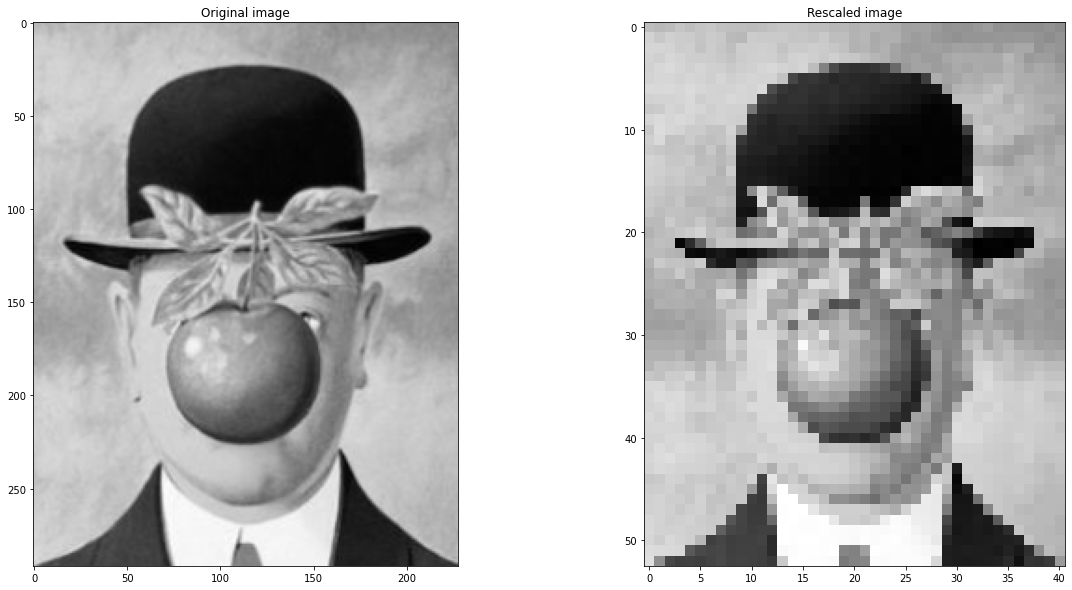

In [35]:
# import image and rescale 

img_path = '/home/sathvikc/AMATH-482-2/AMATH-482/Homework Assignments/Homework 5/SonOfMan.png'

# read image
img_og = ski.io.imread(img_path)

# convert to grayscale and visualize 
img_og = ski.color.rgb2gray(img_og)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img_og, cmap = 'gray')
ax[0].set_title("Original image")

print("Original size: ", img_og.shape)

# resize image 
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)

ax[1].imshow(img, cmap='gray')
ax[1].set_title("Rescaled image")

In [36]:
# constrauct forward and inverse DCT matrices 

# construct DCT matrix
def construct_DCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: D DCT matrix mapping image.flatten() to 
  #         DCT(image).flatten()

  Dx = spfft.dct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.dct(np.eye(Ny), axis = 0, norm='ortho')

  D = np.kron(Dy, Dx)

  return D

# construct inverse DCT matrix
def construct_iDCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: iD iDCT matrix mapping DCT(image).flatten() to 
  #         image.flatten()

  Dx = spfft.idct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.idct(np.eye(Ny), axis = 0, norm = 'ortho')

  D = np.kron(Dy, Dx)

  return D

Question 1

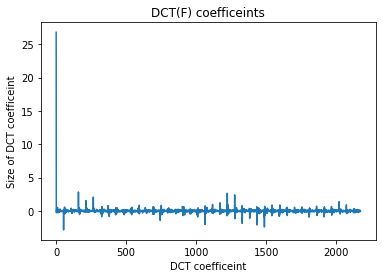

In [37]:
DCT = construct_DCT_Mat(53, 41)
iDCT = construct_iDCT_Mat(53, 41)
DCT_F = np.dot(DCT, img.flatten())
fig, ax = plt.subplots()
ax.set_title('DCT(F) coefficeints')
ax.set_xlabel('DCT coefficeint')
ax.set_ylabel('Size of DCT coefficeint')
ax.plot(np.copy(DCT_F))
fig.savefig('DCT_F_coefficients.png')

Cutoff value:  0.2799011285792195
Cutoff value:  0.1765664344256237
Cutoff value:  0.09807774700885896
Cutoff value:  0.026025361428830194


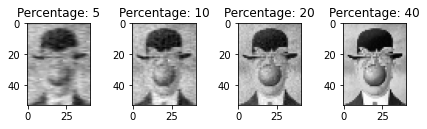

In [38]:
percentages = [5, 10, 20, 40]
fig, ax = plt.subplots(1, 4)
fig.tight_layout()
for index, percent in enumerate(percentages): 
  copy_of_DFT = np.copy(DCT_F)

  cutoff_value = np.percentile(copy_of_DFT, 100 - percent)
  print("Cutoff value: ", cutoff_value)
  for i in range(len(copy_of_DFT)):
    if np.abs(copy_of_DFT[i]) < cutoff_value:
      copy_of_DFT[i] = 0

  vec_F = np.dot(iDCT, copy_of_DFT)

  image = np.reshape(vec_F, (53, 41))
  ax[index].imshow(image, cmap='gray')
  ax[index].set_title("Percentage: " + str(percent))
fig.savefig('DCT_F_coefficients_cutoff.png')

Question 2

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 18 04:28:25 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 18 04:28:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 18 04:28:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 18 04:28:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:28:25 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 18 04:28:25 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 31 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:28:25 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:28:25 PM: Finished problem compilation (took 3.895e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:28:25 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  9.1750e-14 -1.6296e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.1839e+01  3.1975e+01  6e+03  2e+02  6e-16  6e-01
 2:  4.4384e+01  4.4726e+01  2e+03  7e+01  3e-16  5e-01
 3:  7.3887e+01  7.4011e+01  8e+02  2e+01  3e-16  2e-01
 4:  1.0312e+02  1.0319e+02  4e+02  1e+01  5e-16  9e-02
 5:  1.2397e+02  1.2399e+02  2e+02  5e+00  4e-16  4e-02
 6:  1.3376e+02  1.3377e+02  7e+01  2e+00  5e-16  2e-02
 7:  1.3708e+02  1.3709e+02  3e+01  1e+00  5e-16  8e-03
 8:  1.3899e+02  1.3899e+02  1e+01  4e-01  6e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 32 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:28:59 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:28:59 PM: Finished problem compilation (took 3.883e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:28:59 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  8.2226e-14 -1.4190e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.1714e+01  3.1847e+01  6e+03  2e+02  6e-16  6e-01
 2:  4.5263e+01  4.5597e+01  2e+03  6e+01  4e-16  5e-01
 3:  7.4165e+01  7.4292e+01  8e+02  2e+01  3e-16  2e-01
 4:  1.0497e+02  1.0503e+02  3e+02  1e+01  4e-16  8e-02
 5:  1.2541e+02  1.2544e+02  1e+02  4e+00  5e-16  3e-02
 6:  1.3301e+02  1.3302e+02  6e+01  2e+00  5e-16  1e-02
 7:  1.3624e+02  1.3624e+02  3e+01  9e-01  5e-16  7e-03
 8:  1.3802e+02  1.3803e+02  1e+01  4e-01  6e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 33 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:29:33 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:29:33 PM: Finished problem compilation (took 3.971e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:29:33 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.2043e-13 -1.3869e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.1990e+01  3.2122e+01  6e+03  2e+02  6e-16  6e-01
 2:  4.6551e+01  4.6885e+01  2e+03  6e+01  3e-16  5e-01
 3:  7.4237e+01  7.4378e+01  9e+02  3e+01  3e-16  2e-01
 4:  1.0584e+02  1.0589e+02  3e+02  1e+01  5e-16  8e-02
 5:  1.2693e+02  1.2695e+02  1e+02  4e+00  5e-16  3e-02
 6:  1.3450e+02  1.3451e+02  7e+01  2e+00  6e-16  2e-02
 7:  1.3838e+02  1.3838e+02  3e+01  9e-01  6e-16  7e-03
 8:  1.4010e+02  1.4011e+02  1e+01  4e-01  5e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 34 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:30:06 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:30:07 PM: Finished problem compilation (took 8.336e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:30:07 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.0607e-12  3.8263e-13  3e+04  8e+02  3e-15  1e+00
 1:  3.2301e+01  3.2649e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.1645e+01  5.1831e+01  1e+03  4e+01  4e-16  2e-01
 3:  1.1346e+02  1.1353e+02  6e+02  2e+01  5e-16  1e-01
 4:  1.6340e+02  1.6343e+02  2e+02  6e+00  7e-16  3e-02
 5:  1.8560e+02  1.8561e+02  8e+01  2e+00  7e-16  1e-02
 6:  1.9472e+02  1.9473e+02  3e+01  9e-01  8e-16  6e-03
 7:  1.9799e+02  1.9799e+02  1e+01  4e-01  8e-16  3e-03
 8:  1.9952e+02  1.9952e+02  5e+00  2e-01  9e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 35 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:30:52 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:30:52 PM: Finished problem compilation (took 8.208e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:30:52 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  9.5682e-13  3.7013e-13  3e+04  8e+02  3e-15  1e+00
 1:  3.2045e+01  3.2385e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.2099e+01  5.2282e+01  1e+03  4e+01  3e-16  2e-01
 3:  1.1194e+02  1.1201e+02  6e+02  2e+01  4e-16  1e-01
 4:  1.6201e+02  1.6204e+02  2e+02  6e+00  6e-16  3e-02
 5:  1.8473e+02  1.8474e+02  8e+01  2e+00  7e-16  1e-02
 6:  1.9345e+02  1.9345e+02  3e+01  1e+00  9e-16  6e-03
 7:  1.9726e+02  1.9726e+02  1e+01  4e-01  9e-16  2e-03
 8:  1.9867e+02  1.9868e+02  5e+00  2e-01  9e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 36 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:31:39 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:31:39 PM: Finished problem compilation (took 8.377e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:31:39 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.0447e-12  3.4700e-13  3e+04  8e+02  3e-15  1e+00
 1:  3.2119e+01  3.2472e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.0100e+01  5.0288e+01  1e+03  4e+01  3e-16  2e-01
 3:  1.0728e+02  1.0737e+02  6e+02  2e+01  4e-16  1e-01
 4:  1.5574e+02  1.5577e+02  2e+02  7e+00  6e-16  4e-02
 5:  1.8310e+02  1.8312e+02  8e+01  3e+00  7e-16  2e-02
 6:  1.9280e+02  1.9280e+02  4e+01  1e+00  1e-15  7e-03
 7:  1.9665e+02  1.9665e+02  1e+01  5e-01  9e-16  3e-03
 8:  1.9823e+02  1.9823e+02  6e+00  2e-01  9e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 37 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:32:27 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:32:27 PM: Finished problem compilation (took 1.330e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:32:28 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  2.3299e-12 -1.9978e-13  4e+04  1e+03  8e-15  1e+00
 1:  3.2904e+01  3.3516e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.6068e+01  5.6176e+01  2e+03  6e+01  6e-16  2e-01
 3:  1.3079e+02  1.3083e+02  6e+02  2e+01  6e-16  6e-02
 4:  1.9523e+02  1.9525e+02  2e+02  6e+00  8e-16  2e-02
 5:  2.2801e+02  2.2802e+02  7e+01  2e+00  1e-15  9e-03
 6:  2.4066e+02  2.4067e+02  3e+01  9e-01  1e-15  4e-03
 7:  2.4543e+02  2.4543e+02  1e+01  3e-01  1e-15  2e-03
 8:  2.4728e+02  2.4728e+02  4e+00  1e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 38 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:33:28 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:33:28 PM: Finished problem compilation (took 1.305e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:33:28 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  2.7924e-12 -2.0376e-13  4e+04  1e+03  8e-15  1e+00
 1:  3.2729e+01  3.3343e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.5239e+01  5.5345e+01  2e+03  6e+01  4e-16  2e-01
 3:  1.2982e+02  1.2985e+02  6e+02  2e+01  5e-16  5e-02
 4:  1.9567e+02  1.9568e+02  2e+02  5e+00  8e-16  2e-02
 5:  2.2810e+02  2.2810e+02  6e+01  2e+00  1e-15  7e-03
 6:  2.3864e+02  2.3865e+02  2e+01  7e-01  1e-15  3e-03
 7:  2.4277e+02  2.4277e+02  1e+01  3e-01  1e-15  2e-03
 8:  2.4437e+02  2.4437e+02  5e+00  1e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 39 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:34:29 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:34:29 PM: Finished problem compilation (took 1.302e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:34:29 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  2.7541e-12 -7.2149e-14  4e+04  1e+03  8e-15  1e+00
 1:  3.2789e+01  3.3412e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.4664e+01  5.4768e+01  2e+03  6e+01  5e-16  2e-01
 3:  1.3035e+02  1.3039e+02  6e+02  2e+01  6e-16  6e-02
 4:  1.9694e+02  1.9696e+02  2e+02  6e+00  8e-16  2e-02
 5:  2.2617e+02  2.2617e+02  8e+01  2e+00  1e-15  9e-03
 6:  2.3900e+02  2.3900e+02  3e+01  9e-01  1e-15  4e-03
 7:  2.4330e+02  2.4330e+02  1e+01  4e-01  1e-15  2e-03
 8:  2.4549e+02  2.4549e+02  5e+00  2e-01  1e-1

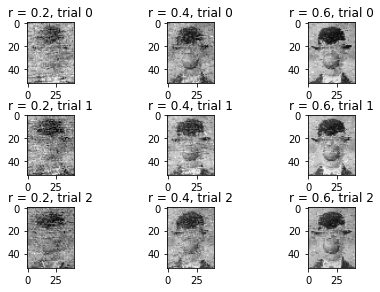

In [39]:
N = 53 * 41
r_vals = [0.2, 0.4, 0.6]
fig, ax = plt.subplots(3, 3)
fig.tight_layout()
for index, r in enumerate(r_vals): 
    for i in range(3):
        M = int(N * r)
        identity = np.eye(N)
        random_permutation = np.random.permutation(identity)
        B = random_permutation[0:M, :]
        y = B@img.flatten()

        A = np.matmul(B, iDCT)

        x_l1 = cvx.Variable(N)
        objective = cvx.Minimize(cvx.norm(x_l1, 1))
        constraints = [A * x_l1 == y]
        cvx.Problem(objective, constraints).solve(verbose=True, solver = 'CVXOPT', max_iter = 1000, reltol = 1e-2, featol = 1e-2)
        x_star = x_l1.value
        print(x_star)


        vec_F = np.dot(iDCT, x_star)

        image = np.reshape(vec_F, (53, 41))
        ax[i][index].imshow(image, cmap='gray')
        ax[i][index].set_title(f'r = {r}, trial {i}')
fig.savefig('F_recovery.png')

Question 3

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 18 04:35:31 PM: Your problem has 2500 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 18 04:35:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 18 04:35:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 18 04:35:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:35:31 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 18 04:35:31 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 40 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 18 04:35:32 PM: Applying reduction CVXOPT
(CVXPY) Mar 18 04:35:33 PM: Finished problem compilation (took 2.490e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 18 04:35:33 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.0896e-14  7.2587e-14  3e+04  1e+03  4e-15  1e+00
 1:  2.9658e+01  3.0189e+01  1e+04  3e+02  1e-15  8e-01
 2:  7.2764e+01  7.2857e+01  1e+03  4e+01  4e-16  1e-01
 3:  2.0177e+02  2.0179e+02  3e+02  8e+00  1e-15  3e-02
 4:  2.8074e+02  2.8075e+02  1e+02  3e+00  2e-15  1e-02
 5:  3.0448e+02  3.0449e+02  4e+01  1e+00  2e-15  5e-03
 6:  3.1328e+02  3.1329e+02  2e+01  6e-01  2e-15  3e-03
 7:  3.1837e+02  3.1837e+02  8e+00  2e-01  2e-15  1e-03
 8:  3.2029e+02  3.2029e+02  3e+00  9e-02  3e-1

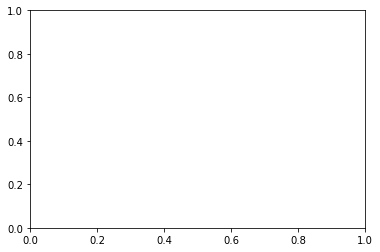

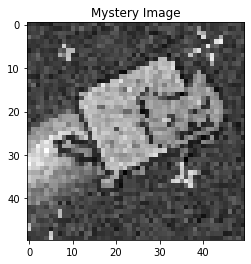

In [40]:
unknown_image = np.load('/home/sathvikc/AMATH-482-2/AMATH-482/Homework Assignments/Homework 5/UnknownImage.npz', allow_pickle=True)
B = unknown_image['B']
y = unknown_image['y']
DCT = construct_DCT_Mat(50, 50)
iDCT = construct_iDCT_Mat(50, 50)
fig, ax = plt.subplots()
N = 50 * 50
r_vals = [0.2, 0.4, 0.6]
fig, ax = plt.subplots()

A = np.matmul(B, iDCT)

x_l1 = cvx.Variable(N)
objective = cvx.Minimize(cvx.norm(x_l1, 1))
constraints = [A * x_l1 == y]
cvx.Problem(objective, constraints).solve(verbose=True, solver = 'CVXOPT', max_iter = 1000, reltol = 1e-2, featol = 1e-2)
x_star = x_l1.value
print(x_star)


vec_F = np.dot(iDCT, x_star)

image = np.reshape(vec_F, (50, 50))
ax.imshow(image, cmap='gray')
ax.set_title('Mystery Image')
fig.savefig('MysteryImage.png')